In [1]:
import random as rand
import numpy.random as rand_2
import matplotlib.pyplot as plt

## 1. Generate Population
The code can generate population of any required size. Each chromosome is in the 1D array representing a route where each unit represents a city e.g, [0,5,1,4,6,8,3,7,9,2] city starts from 0 upto the given cities in matrix. In chromosome each city is represented only one time as Travelling salesman problem requires each city to be visited only once. See below for optimal population size discussion

## 2. Fitness values
Each chromosome represents a route so its total distance can be calculated. I am using an objective function/fitness function to minimize total distance. So smaller the total distance, bigger is the fitness value
       
## 3. Selection
We Randomly select an individual by calculating its selection probability

## 4.1 Reproduction / Crossover
To do a chromosome between x and y parents, we use order 1 crossover  

  **Step 1**: Select a random subsequence from x  
  
  **Step 2**: Place that subsequence in relevant indices in child and mark out these in y  
  
  **Step 3**: Starting from right side grab the units of y and place them in child in empty position starting from right side. Those units are skipped which are marked out


## 4.2 Mutation
Mutate child with probability 0.1 by swapping two random cities in chromosome

In [2]:
class TspAgent:
    def __init__(self, cities_distances):
        self.cities_distances = cities_distances
      
    
    # Generating population randomly from population_size
    def generate_population(self, population_size=4):
        n = len(self.cities_distances)
        chromosome = []
        
        # creating a single chromosome. Each unit in chromosome represents a city in form of number like city1 -> 0, city2 -> 1 etc. 
        for i in range(n):
            chromosome.append(i)
            
        population = [chromosome.copy() for _ in range(population_size)]  
        
        for i in range(population_size):
            individual_chromosome = population[i]
            
            # Swapping two random cities/unit n times in each chromosome 
            for j in range(len(individual_chromosome)):   
                rand_city_1 = rand.randrange(0, len(individual_chromosome))
                rand_city_2 = rand.randrange(0, len(individual_chromosome))
                
                individual_chromosome[rand_city_1], individual_chromosome[rand_city_2] = individual_chromosome[rand_city_2], individual_chromosome[rand_city_1]

        return population
     
        
    # Calculate total distance in a chromosome
    def calculate_total_distance(self, individual):
        total_distance = 0
        prev_city = individual[0] 
        
        for city in individual[1:]:
            if self.cities_distances[prev_city][city] is not None:  # As matrix provided is upper triangular matrix
                total_distance = total_distance + self.cities_distances[prev_city][city]
            else:
                total_distance = total_distance + self.cities_distances[city][prev_city]
            
            prev_city = city
        
        return total_distance
   

    # calculate fitness of an individual chromosome, shorter the total distance the more bigger fitness value returned
    def calculate_fitness(self, individual):
        total_distance = self.calculate_total_distance(individual)
            
        return 1/total_distance   # As our objective function is to minimize total distance thats why dividing a bigger total distance by 1 will make it a small fitness value
    
    
    # Randomly select any individual from population by its selection probability
    def select(self, population, calculate_fitness):
        fitness_values = [calculate_fitness(individual) for individual in population]  # fitness values of population
        sum_fitness = sum(fitness_values)  # sum of fitness values
        selection_probs = [fitness_values[index]/sum_fitness for index, individual in enumerate(population)]  # Array holding selection prob for each individual  selection_prob(of individual) = fitness_value(of individual) / sum_of_all_fitness_values
#         print([(i, f, p) for i, f, p in zip(population, fitness_values, selection_probs)],'\n')
        population_indices = [ind for ind in range(len(population))]   # Indices of individual in population, necessary for numpy.random.choice as it requires a=1D array
        selected_individual_index = rand_2.choice(population_indices, p=selection_probs)   # p is the selected_probs of corresponding individuals

        return population[selected_individual_index] 
    
    
    # Reproduce a child using x and y chromosome by ordered 1 crossover
    def reproduce(self, x, y):
        n = len(x) 
        child = [None] * n   # Initializing child
        
        # step 1: Select a random subsequence from x
        rand_index_1, rand_index_2 = rand.randrange(0, n), rand.randrange(0, n)
        subseq_start, subseq_end = min(rand_index_1, rand_index_2), max(rand_index_1, rand_index_2)
        
        # step 2: Place that subsequence in relevant indices in child and mark out these in y
        for i in range(subseq_start, subseq_end+1):
            child[i] = x[i]

        y_remaining = [city  for city in y  if city not in child]
        none_indexes = [index  for index, city in enumerate(child)  if city is None]
        
        # step 3: Starting from right side grab the units of y and place them in child in empty positions starting from right side. Those units are skipped which are marked out
        for i, city in zip(none_indexes, y_remaining):
            if child[i] is None:
                child[i] = city
                
        return child
    
    
    # Mutate a child by randomly swapping two random cities
    def mutate(self, child):
        new_child = child.copy()
        n = len(child)
        rand_index_1, rand_index_2 = rand.randrange(0, n), rand.randrange(0, n)
        new_child[rand_index_1], new_child[rand_index_2] = child[rand_index_2], child[rand_index_1]
        return new_child        
    
    
    # Perform genetic search
    def genetic_search(self, population, calculate_fitness, generations=50):
        
        for _ in range(generations):   # repeat unitl any individual is fit enough or time limit (keeping track of generations here)
            new_population = []
            
            for _ in range(len(population)):  
                x = self.select(population, calculate_fitness)  
                y = self.select(population, calculate_fitness)

                child = self.reproduce(x, y)
                if (rand.uniform(0,1) <= 0.1):  # Mutate child with probability 0.1
                    child = self.mutate(child)
                    
                new_population.append(child)
            
            population = new_population
                
        return max(population, key=calculate_fitness)   # Returning the most fit individual with higher fitness value

In [3]:
cities_distances = [ [0,    60,   100, 510,   620,  40,   70,   80,   120,  650],
                     [None, 0,    60,  130,   40,   80,   90,   90,   440,  540],
                     [None, None, 0,   450,   450,  860,  910,  190,  10,   145],
                     [None, None, None, 0,    70,   1500, 440,  220,  660,  250],
                     [None, None, None, None, 0,    260,  160,  330,  120,  50 ],
                     [None, None, None, None, None, 0,    370,  260,  350,  110],
                     [None, None, None, None, None, None, 0,    50,   120,  270],
                     [None, None, None, None, None, None, None, 0,    330,  990],
                     [None, None, None, None, None, None, None, None, 0,    330],
                     [None, None, None, None, None, None, None, None, None, 0  ]  ]

In [11]:
tsp = TspAgent(cities_distances)
p = tsp.generate_population(population_size=20)
print(p, '\n')
sol = tsp.genetic_search(population=p, calculate_fitness=tsp.calculate_fitness, generations=1000)
print(sol, tsp.calculate_total_distance(sol), tsp.calculate_fitness(sol))

[[0, 4, 1, 3, 2, 7, 5, 8, 6, 9], [5, 7, 1, 3, 4, 9, 0, 6, 2, 8], [2, 4, 7, 3, 6, 5, 0, 1, 8, 9], [4, 0, 2, 3, 8, 7, 1, 9, 5, 6], [1, 4, 7, 5, 0, 3, 8, 2, 6, 9], [5, 8, 2, 6, 4, 0, 3, 7, 1, 9], [0, 4, 7, 5, 1, 6, 2, 9, 3, 8], [4, 1, 2, 6, 0, 5, 9, 3, 8, 7], [6, 5, 1, 9, 8, 4, 2, 7, 3, 0], [3, 5, 2, 8, 4, 6, 1, 9, 0, 7], [0, 1, 2, 7, 9, 5, 6, 8, 4, 3], [1, 3, 2, 4, 0, 5, 8, 7, 6, 9], [9, 6, 1, 2, 4, 5, 0, 3, 8, 7], [0, 2, 6, 8, 5, 4, 9, 3, 7, 1], [2, 3, 1, 6, 9, 5, 4, 8, 7, 0], [3, 6, 7, 0, 1, 8, 5, 4, 2, 9], [5, 1, 4, 9, 3, 0, 6, 7, 8, 2], [4, 9, 0, 2, 6, 5, 3, 7, 8, 1], [4, 3, 9, 1, 6, 7, 5, 8, 2, 0], [5, 7, 2, 9, 1, 4, 8, 3, 0, 6]] 

[3, 4, 9, 5, 0, 6, 7, 1, 2, 8] 550 0.0018181818181818182


In [5]:
max_population_size = 20
tsp = TspAgent(cities_distances)
pops = []
sols_dists_1 = []

for population_size in range(2,max_population_size):
        population = tsp.generate_population(population_size=population_size)
        sol = tsp.genetic_search(population=population, calculate_fitness=tsp.calculate_fitness)
        pops.append(population_size)
        sols_dists_1.append(tsp.calculate_total_distance(sol))

In [6]:
max_generations = 300
tsp = TspAgent(cities_distances)
gens = []
sols_dists_2 = []

for generations in range(2,max_generations):
    population = tsp.generate_population()
    sol = tsp.genetic_search(population=population, calculate_fitness=tsp.calculate_fitness, generations=generations)
    gens.append(generations)
    sols_dists_2.append(tsp.calculate_total_distance(sol))

Text(0, 0.5, 'distance b/w cities in solution')

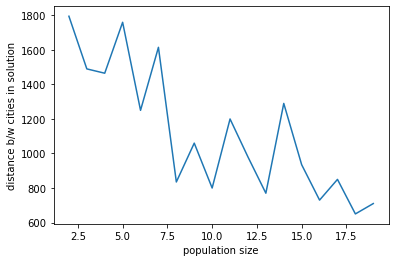

In [7]:
plt.plot(pops, sols_dists_1)
plt.xlabel('population size')
plt.ylabel('distance b/w cities in solution')

## Optimal Population size
As one can see from the above plot I think **optimal population size here is 20**, as solution is able to converge more when population size is near 20. Greater population gives more optimized results as proved by the above plot

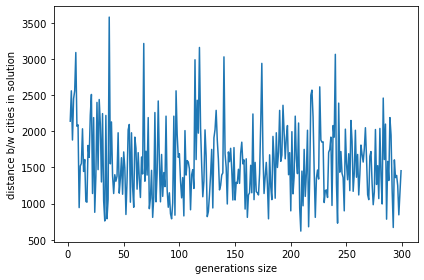

In [8]:
plt.plot(gens, sols_dists_2)
plt.xlabel('generations size')
plt.ylabel('distance b/w cities in solution')
plt.tight_layout()

## Generations
As one can see here in our case, population size impacts genetic search for Travelling Salesman Problem more but generations also lead somewhat to solution convergence 